In [20]:
# Import tensorflow on CPU
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    

import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

import sys
sys.path.append('../')
import wave_gan_resize

In [21]:
#model = '../models/flute_single_pitch/flute_wpgan_upsample_d50_pitch_0729_2.h5'
model = '../models/mallet_wpgan_nearest_d50_pitch_0729.h5'
#model = '../models/mallet_wpgan_nearest_d50_pitch_0801.h5'
#model = '../models/flute_single_pitch/flute_wpgan_upsample_pitch_0730.h5'
model = '../models/mallet_wpgan_n_k5_d50_0803.h5'

In [22]:
custom_objects = {
    'Resize': wave_gan_resize.Resize
}

In [23]:
generator = tf.keras.models.load_model(model, 
                                       custom_objects=custom_objects)

In [24]:
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16384)             1638400   
_________________________________________________________________
batch_normalization (BatchNo (None, 16384)             65536     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 16384)             0         
_________________________________________________________________
dropout (Dropout)            (None, 16384)             0         
_________________________________________________________________
reshape (Reshape)            (None, 16, 1024)          0         
_________________________________________________________________
resize (Resize)              (None, 64, 1024)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 64, 512)           2

In [25]:
# Iterated below for saving multiple audio files
num = 0

Run time 21.6293 ms


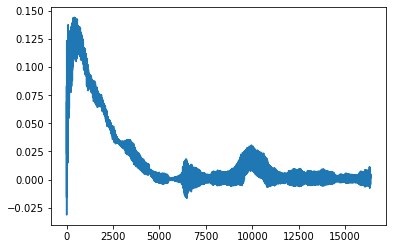

In [32]:
# Time how long it takes to generate a sound
start = time.time_ns()

noise = tf.random.normal([1, 100])
audio = generator(noise, training=False)

finish = time.time_ns()
print("Run time {} ms".format((finish - start) / 1000000.))

num += 1

plt.plot(audio[0])

ipd.Audio(audio[0,:,0], rate=16000)

In [78]:
sf.write('./generated_audio/flute_wpgan_upsample_d50_pitch_{}.wav'.format(num), audio[0,:,0], 16000, subtype='PCM_16')